In [56]:
#warning libraries
import warnings
warnings.filterwarnings("ignore")

In [57]:
#scintific and data manipulation libraris
import pandas as pd
import numpy as np
import math
import gc
import os
import sklearn

In [58]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
#Libraries
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics

sklearn.preprocessing.LabelEncoder
sklearn.preprocessing.OneHotEncoder
sklearn.preprocessing.MinMaxScaler
sklearn.preprocessing.Normalizer
sklearn.preprocessing.RobustScaler
sklearn.preprocessing.MaxAbsScaler

sklearn.model_selection.KFold
sklearn.model_selection.StratifiedKFold
sklearn.model_selection.train_test_split
sklearn.model_selection.cross_val_score

sklearn.tree.DecisionTreeClassifier
sklearn.ensemble.RandomForestClassifier
sklearn.ensemble.VotingClassifier

sklearn.metrics.f1_score
sklearn.metrics.confusion_matrix
sklearn.metrics.classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import VotingClassifier

In [60]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import xgboost as xgb
import lightgbm as lbb
import catboost as cb

In [62]:
#boosting algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [63]:
#data visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

In [64]:
np.random.seed(0)

In [65]:
#set location path
import os
from google.colab import files
train=pd.read_csv('/content/drive/MyDrive/train.csv')
test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [66]:
#look at head() of data
display('Train Head : ', train)
display('Test Head : ',test)

'Train Head : '

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


'Test Head : '

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [69]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [70]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


In [71]:
def display_unique(data):
  for column in data.columns:
    print("No of unique values in "+column+" Column are : "+str(data[column].nunique()))
    print("Actual unique values in "+column+" Column are : "+str(data[column].sort_values(ascending=True,na_position='last').unique))
    print(" ")
display_unique(train)

No of unique values in employee_id Column are : 54808
Actual unique values in employee_id Column are : <bound method Series.unique of 52690        1
10257        2
32895        4
4424         5
41261        7
         ...  
31061    78292
19088    78294
52714    78296
9030     78297
52646    78298
Name: employee_id, Length: 54808, dtype: int64>
 
No of unique values in department Column are : 9
Actual unique values in department Column are : <bound method Series.unique of 18848     Analytics
11552     Analytics
4342      Analytics
11555     Analytics
32621     Analytics
            ...    
29416    Technology
13247    Technology
13249    Technology
13228    Technology
18850    Technology
Name: department, Length: 54808, dtype: object>
 
No of unique values in region Column are : 34
Actual unique values in region Column are : <bound method Series.unique of 46037    region_1
41235    region_1
52544    region_1
9015     region_1
24325    region_1
           ...   
41179    region_9
15511 

In [72]:
#display how each feature is related to target variable in flow
fig=px.parallel_categories(train[['is_promoted','department','education','gender','previous_year_rating','recruitment_channel']],color='is_promoted',color_continuous_scale=px.colors.sequential.Aggrnyl)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

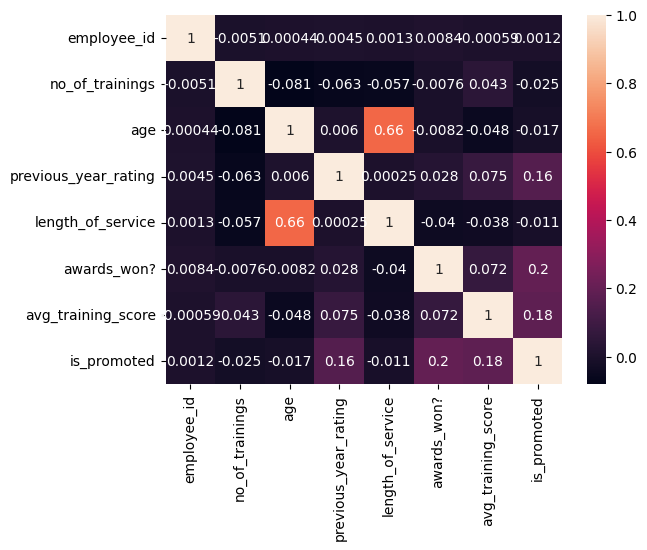

In [73]:
#display correlation between features through heatmap : lighter color higher correlation if close to one (1)
sns.heatmap(train.corr(),annot=True)

In [74]:
def remove_duplicates(data):
  print("Before removing duplicates, number of rows: ", data.shape[0])
  data.drop_duplicates(keep="first", inplace=True)
  print('After removing duplicates, number of rows: ', data.shape[0])
  return 'Checked Duplicates'

In [75]:
#remove duplicates from "train" data
remove_duplicates(train)

Before removing duplicates, number of rows:  54808
After removing duplicates, number of rows:  54808


'Checked Duplicates'

Missing values are found in previous_year_rating and education column both train and test data
lets handle based on intutuion

Why is data missing in column previous year rating?

1)data was not entered as those employees were freshers ie length of service is one

2)No data was there in data source itself

Logically we are imputing with "0" as Freshers with 1 year experience may not have previous year rating at all


In [76]:

#Filling the missing values in train and test

train["previous_year_rating"]=train["previous_year_rating"].fillna(0)
test["previous_year_rating"]=test["previous_year_rating"].fillna(0)

train['Fresher']=train['previous_year_rating'].apply(lambda x : 'Frsher' if x==0 else 'Experienced')

display(train['Fresher'].value_counts())
display(train[['previous_year_rating','length_of_service','Fresher']][train['Fresher']=='Fresher'])
display(train[['previous_year_rating','length_of_service','Fresher']].head(25))

del train['Fresher']

Experienced    50684
Frsher          4124
Name: Fresher, dtype: int64

,previous_year_rating,length_of_service,Fresher


,previous_year_rating,length_of_service,Fresher
0,5.0,8,Experienced
1,5.0,4,Experienced
2,3.0,7,Experienced
3,1.0,10,Experienced
4,3.0,2,Experienced
5,3.0,7,Experienced
6,3.0,5,Experienced
7,3.0,6,Experienced
8,4.0,5,Experienced
9,5.0,5,Experienced


In [77]:
#display missing values in train and test data
display("Train : ",train.isnull().sum())
display("Test : ",test.isnull().sum())

'Train : '

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

'Test : '

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [78]:
#ffill ->forward fill that fills the missing value with previous row value
#if previous row value is null then then moves to next element without filling

#bfill->back fill that fills the missing value with next row value
#if next value is null then moves forward without filling

#filling with mode and new category called "others" are the most commonly used techniques which are used by dotn work here
#so we can assume that while collecting data relevent memebers data were collected close to each other

train["education"]=train["education"].ffill(axis=0)
train["education"]=train["education"].bfill(axis=0)

test["education"]=test["education"].ffill(axis=0)
test["education"]=test["education"].bfill(axis=0)

#display missing values in train and test data
display("Train : ",train.isnull().sum())
display("Test : ",test.isnull().sum())

'Train : '

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

'Test : '

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

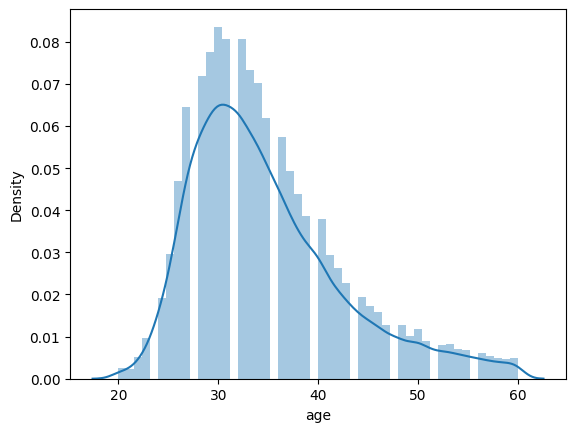

In [79]:
#Feature Engineering
#based on age distribution most of the people in the age distribution 20-40 will also be waiting for promotion
#so we have created two bins 20-29 29-39 and remaining one bin for 39-49
#distplot-> plot a univatriate (single feature) distribution of observations
sns.distplot(train['age'])
train['age'] = pd.cut(x=train['age'] , bins=[20,29,39,49], labels=[20,30,40])
test['age'] = pd.cut(x=test['age'], bins=[20,29,39,49],labels=[20,30,40])

In [80]:
# Splitting data into predictors (independent variables) and target (dependent variable) for training set
test=train[40000:]
train=train[:40000]

x_train = train[['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']]
y_train = train[['is_promoted']]

# Splitting data into predictors (independent variables) and target (dependent variable) for test set
x_test = test[['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']]
y_test = test[['is_promoted']]


In [81]:
from sklearn.preprocessing import LabelEncoder

def data_encoding(encoding_strategy, encoding_data, encoding_columns):
    if encoding_strategy == 'LabelEncoding':
        print("IF Label Encoding")
        encoder = LabelEncoder()
        for column in encoding_columns:
            print("column:", column)
            encoding_data[column] = encoder.fit_transform(encoding_data[column])
    elif encoding_strategy == 'OneHotEncoding':
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data, columns=encoding_columns)

    return encoding_data



Quote:
Applied One Hot Encoding it will be applied to Object/Categorical Columns Only:

It's most common to one-hot encode these "object" columns, since they can't be plugged directly into most mo Pandas offers a convenient function called "get_dunnies" to get one-hot encodings.

Many machine learning algorithms cannot operate on label data directly.

They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form.
a one-hot encoding can be applied to the integer representation.

This is where the integer encoded variable is removed and a new binary variable is added for each unique int

In [82]:
data=["Red","Blue","Green","Red","Blue","Blue"]
df=pd.DataFrame(data,columns=['Color'])

print("Before OneHotEncoding : ")
display(df)
print("\nAfter OneHotEncoding : ")
display(pd.get_dummies(df))

encoding_columns=['department', 'region','recruitment_channel','age', 'gender','education']
encoding_strategy=['LabelEncoding','OneHotEncoding']

x_train_encode=data_encoding(encoding_strategy[1],x_train,encoding_columns)
x_test_encode=data_encoding(encoding_strategy[1],x_test,encoding_columns)

#display encoded train and test features

display(x_train_encode.head())
display(x_test_encode.head())

Before OneHotEncoding : 


,Color
0,Red
1,Blue
2,Green
3,Red
4,Blue
5,Blue



After OneHotEncoding : 


,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
5,1,0,0


ELIF OneHotEncoding
ELIF OneHotEncoding


,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1,5.0,8,0,49,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,1,5.0,4,0,60,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
2,1,3.0,7,0,50,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
3,2,1.0,10,0,50,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,1,3.0,2,0,73,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above
40000,1,1.0,9,0,51,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
40001,1,0.0,1,0,51,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
40002,2,5.0,3,0,45,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
40003,2,3.0,5,0,49,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1
40004,1,3.0,8,0,46,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [83]:
#Data Scaling : RobustScaler,StandardScaler,MinMaxScaler,MaxAbsScaler
def data_scaling(scaling_strategy,scaling_data,scaling_columns):
  if(scaling_strategy=='RobustScaler'):
    scaling_data[scaling_columns]=RobustScaler().fit_transform(scaling_data[scaling_columns])
  elif(scaling_strategy=='StandardScaler'):
    scaling_data[scaling_columns]=StandardScaler().fit_transform(scaling_data[scaling_columns])
  elif(scaling_strategy=='MinMaxScaler'):
    scaling_data[scaling_columns]=MinMaxScaler().fit_transform(scaling_data[scaling_columns])
  elif(scaling_strategy=='MaxAbsScaler'):
    scaling_data[scaling_columns]=MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
  else:
    scaling_data[scaling_columns]=RobustScaler().fit_transform(scaling_data[scaling_columns])
  return scaling_data


RobustScaler is better in handling Outliers:

Standardization of a dataset if a common requirement for many machine learning estimators.

Typically this is done by removing the mean and scaling to unit variance.

However, OUTLIERS can often influence the sample mean / variance in a negative way.

In such cases RobustSclaer which uses the median and the interquartile range often give BETTER results.

In [84]:
scaling_strategy=["RobustScaler","StandardScaler","MinMaxScaler","MaxAbsScaler"]
x_train_scale=data_scaling(scaling_strategy[0],x_train_encode,x_train_encode.columns)
x_test_scale=data_scaling(scaling_strategy[0],x_test_encode,x_test_encode.columns)
#display scaled train and test features
display(x_train_scale.head())
display(x_test_scale.head())

,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above
0,0.0,1.0,0.75,0.0,-0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,1.0
1,0.0,1.0,-0.25,0.0,0.00,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.50,0.0,-0.40,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-1.0,1.25,0.0,-0.40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,-0.75,0.0,0.52,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0


,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,gender_f,gender_m,education_Bachelor's,education_Below Secondary,education_Master's & above
40000,0.0,-1.0,0.8,0.0,-0.375000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,0.0,1.0
40001,0.0,-1.5,-0.8,0.0,-0.375000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
40002,1.0,1.0,-0.4,0.0,-0.625000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40003,1.0,0.0,0.0,0.0,-0.458333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,1.0
40004,0.0,0.0,0.6,0.0,-0.583333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,0.0,1.0


In [85]:
#create a baseline ML model for binary classification problem
#create a dictionary (key->value pairs) for ML Model Name -> ML Model functions with Hyper Parameter
Classifiers={'0.XGBoost':XGBClassifier(learning_rate=0.1,n_estimators=494,max_depth=5,subsample=0.70,verbosity=0,scale_pos_weight=2.5,updater='grow_histmaker',base_score=0.2),
             '1.CatBoost':CatBoostClassifier(learning_rate=0.1,n_estimators=494,max_depth=5,subsample=0.70,scale_pos_weight=2.5),
             '2.LightGBM':LGBMClassifier(subsample_freq=2,objective='binary',importance_type='gain',verbosity=-1,max_bin=60,num_leaves=300,boosting_type='dart',learning_rate=0.15,n_estimators=494,max_depth=5,scale_pos_weight=2.5)
             }
print(list(Classifiers.keys()))
print(list(Classifiers.values()))

['0.XGBoost', '1.CatBoost', '2.LightGBM']
[XGBClassifier(base_score=0.2, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=494, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), <catboost.core.CatBoostClassifier object at 0x7f2d19f312d0>, LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leave

In [86]:
#Improve ML Model with voting classifier with MODEL Evaluation METRIC "F1" and predict target is_promoted
voting_model=VotingClassifier(estimators=[
    ('XGBoost_Best',list(Classifiers.values())[0]),
    ('CatBoost_Best',list(Classifiers.values())[1]),
    ('LightGBMBoost_Best',list(Classifiers.values())[2])
],voting='soft',weights=[5,5,5.2])
voting_model.fit(x_train_scale,y_train)
predictions_of_voting=voting_model.predict_proba(x_test_scale)[::,1]

0:	learn: 0.6267925	total: 27.7ms	remaining: 13.6s
1:	learn: 0.5788956	total: 53.6ms	remaining: 13.2s
2:	learn: 0.5384129	total: 79.6ms	remaining: 13s
3:	learn: 0.5109280	total: 104ms	remaining: 12.8s
4:	learn: 0.4875120	total: 132ms	remaining: 12.9s
5:	learn: 0.4675543	total: 149ms	remaining: 12.1s
6:	learn: 0.4536423	total: 161ms	remaining: 11.2s
7:	learn: 0.4354995	total: 174ms	remaining: 10.6s
8:	learn: 0.4236208	total: 187ms	remaining: 10.1s
9:	learn: 0.4156838	total: 201ms	remaining: 9.72s
10:	learn: 0.4096211	total: 225ms	remaining: 9.87s
11:	learn: 0.4055439	total: 243ms	remaining: 9.75s
12:	learn: 0.3981170	total: 253ms	remaining: 9.36s
13:	learn: 0.3923212	total: 263ms	remaining: 9.01s
14:	learn: 0.3870735	total: 273ms	remaining: 8.71s
15:	learn: 0.3826392	total: 283ms	remaining: 8.44s
16:	learn: 0.3797530	total: 292ms	remaining: 8.19s
17:	learn: 0.3783976	total: 301ms	remaining: 7.97s
18:	learn: 0.3765342	total: 312ms	remaining: 7.79s
19:	learn: 0.3747333	total: 324ms	remain

In [87]:
#Result & improve F1 Score
#Round off probability results
predictions=[int(round(value)) for value in predictions_of_voting]
#create a dataframe table for submission purpose
Result_Promoted=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':predictions})
#name the submission file and download in current working path
file_name='RANK_4_ENSEMBLE_VOTING_SOFT_5_5_5.2'
pd.DataFrame(Result_Promoted).to_csv(file_name+'.csv',index=False)
Classifiers={'0.XGBoost':XGBClassifier(learning_rate=0.1,n_estimators=494,max_depth=5,subsample=0.70,verbosity=0,scale_pos_weight=2.5,updater='grow_histmaker',base_score=0.2),
             '1.CatBoost':CatBoostClassifier(learning_rate=0.1,n_estimators=494,max_depth=5,subsample=0.70,scale_pos_weight=2.5),
             '2.LightGBM':LGBMClassifier(subsample_freq=2,objective='binary',importance_type='gain',verbosity=-1,max_bin=60,num_leaves=300,boosting_type='dart',learning_rate=0.15,n_estimators=494,max_depth=5,scale_pos_weight=2.5)
             }
print(list(Classifiers.keys()))
print(Result_Promoted)

['0.XGBoost', '1.CatBoost', '2.LightGBM']
       employee_id  is_promoted
40000        35518            0
40001        21835            0
40002        34013            0
40003         6748            0
40004        31294            0
...            ...          ...
54803         3030            0
54804        74592            0
54805        13918            0
54806        13614            0
54807        51526            0

[14808 rows x 2 columns]


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

# Initialize individual classifiers
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = SVC(probability=True)
clf4 = CatBoostClassifier(bootstrap_type='Bayesian')

# Initialize the ensemble classifier
eclf = VotingClassifier(
    estimators=[('rf', clf1), ('lr', clf2), ('svc', clf3), ('catboost', clf4)],
    voting='soft'
)

# Fit the individual classifiers
clf1.fit(x, y)
clf2.fit(x, y)
clf3.fit(x, y)
clf4.fit(x, y)

# Fit the ensemble classifier
eclf.fit(x, y)

# Predict class probabilities for all classifiers
probas = [c.predict_proba(x) for c in (clf1, clf2, clf3, clf4, eclf)]

# Get class probabilities for the first sample in the dataset
print(probas[0][0])


Learning rate set to 0.000975
0:	learn: 0.6924535	total: 577us	remaining: 577ms
1:	learn: 0.6921800	total: 1.27ms	remaining: 633ms
2:	learn: 0.6914880	total: 1.89ms	remaining: 630ms
3:	learn: 0.6912147	total: 5.31ms	remaining: 1.32s
4:	learn: 0.6909413	total: 5.7ms	remaining: 1.13s
5:	learn: 0.6902503	total: 6.06ms	remaining: 1s
6:	learn: 0.6897075	total: 6.4ms	remaining: 908ms
7:	learn: 0.6894327	total: 6.74ms	remaining: 836ms
8:	learn: 0.6892249	total: 7.04ms	remaining: 775ms
9:	learn: 0.6890111	total: 7.33ms	remaining: 726ms
10:	learn: 0.6884696	total: 7.66ms	remaining: 689ms
11:	learn: 0.6877804	total: 7.96ms	remaining: 655ms
12:	learn: 0.6870989	total: 11.1ms	remaining: 844ms
13:	learn: 0.6865546	total: 15.1ms	remaining: 1.06s
14:	learn: 0.6860130	total: 19.4ms	remaining: 1.27s
15:	learn: 0.6860129	total: 20.5ms	remaining: 1.26s
16:	learn: 0.6854702	total: 22.2ms	remaining: 1.28s
17:	learn: 0.6849288	total: 23.7ms	remaining: 1.29s
18:	learn: 0.6843863	total: 25.8ms	remaining: 1.33